# 당뇨와 고혈압 질병 예측
- BTH_G : 연령(그룹)
- SBP : 수축기혈압
- DBP : 이완기혈압
- FBS : 공복혈당
- SEX : 성별(남성:1, 여성:2)
- DIS : 고혈압/당뇨병 진료여부
  - 고혈압/당뇨병 진료내역 있음: 1
  - 고혈압 진료내역 있음: 2
  - 당뇨병 진료내역 있음: 3
  - 고혈압/당뇨병 진료내역 없음: 4
- BMI : 체질량지수

## 정상 vs 비정상
- 4(정상) : 0
- 1 / 2 / 3(비정상) : 1

- 0(정상) 기준으로 1(비정상) 오버샘플링 : RandomOversampling
- 1(비정상) : 1 / 2 / 3 각각 레이블링 됨

1 / 2 / 3 = 비율) 1 : 3 : 1
=> 1 : 1 : 1 비율로 오버샘플링

1 / 0 = 비율) 1 : 3
=> 1 : 1 비율로 오버샘플링

# LightGBM
+
## RandomOversampling + 질병 1, 2, 3 비율 => 1 : 1 : 1

### LightGBM 설치:

```
pip3 install lightgbm

```



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd # 시리즈, 데이터프레임 포맷 데이터 처리를 위한 라이브러리
import warnings; warnings.filterwarnings(action='ignore') # 경고 메시지 무시
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import pickle # 객체 입출력을 위한 라이브러리

from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score


# LightGBM 임포트
from lightgbm import LGBMClassifier # LightGBM 불러오기

from pandas.core.common import random_state
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 분류 알고리즘
from sklearn.tree import DecisionTreeClassifier # 의사결정나무 분류 알고리즘

import matplotlib.pyplot as plt
import seaborn as sns

# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 데이터 불러오기

In [ ]:
# Disease 

df = pd.read_csv('/content/drive/MyDrive/health/data/data(over_dis_vs_nor).csv', encoding='cp949')
df

,SEX,BTH_G,SBP,DBP,FBS,BMI,DIS,Dis
0,0,1,90,50,86,20.1,2,1
1,0,1,120,80,90,27.0,3,1
2,0,1,100,60,112,31.8,2,1
3,0,1,170,120,86,23.3,2,1
4,0,1,135,80,104,35.0,2,1
...,...,...,...,...,...,...,...,...
1481319,1,21,130,90,185,26.3,3,1
1481320,1,18,140,100,120,28.8,2,1
1481321,0,12,100,60,101,23.0,3,1
1481322,1,20,134,72,168,23.1,3,1


In [ ]:
# 1,0 정답 레이블 삭제
df.drop(['Dis'], axis=1, inplace=True)
df

,SEX,BTH_G,SBP,DBP,FBS,BMI,DIS
0,0,1,90,50,86,20.1,2
1,0,1,120,80,90,27.0,3
2,0,1,100,60,112,31.8,2
3,0,1,170,120,86,23.3,2
4,0,1,135,80,104,35.0,2
...,...,...,...,...,...,...,...
1481319,1,21,130,90,185,26.3,3
1481320,1,18,140,100,120,28.8,2
1481321,0,12,100,60,101,23.0,3
1481322,1,20,134,72,168,23.1,3


In [ ]:
df.reset_index()

,index,SEX,BTH_G,SBP,DBP,FBS,BMI,DIS
0,0,0,1,90,50,86,20.1,2
1,1,0,1,120,80,90,27.0,3
2,2,0,1,100,60,112,31.8,2
3,3,0,1,170,120,86,23.3,2
4,4,0,1,135,80,104,35.0,2
...,...,...,...,...,...,...,...,...
1481319,1481319,1,21,130,90,185,26.3,3
1481320,1481320,1,18,140,100,120,28.8,2
1481321,1481321,0,12,100,60,101,23.0,3
1481322,1481322,1,20,134,72,168,23.1,3


In [ ]:
df.reset_index(drop=True)

,SEX,BTH_G,SBP,DBP,FBS,BMI,DIS
0,0,1,90,50,86,20.1,2
1,0,1,120,80,90,27.0,3
2,0,1,100,60,112,31.8,2
3,0,1,170,120,86,23.3,2
4,0,1,135,80,104,35.0,2
...,...,...,...,...,...,...,...
1481319,1,21,130,90,185,26.3,3
1481320,1,18,140,100,120,28.8,2
1481321,0,12,100,60,101,23.0,3
1481322,1,20,134,72,168,23.1,3


In [ ]:
df.sample(frac=1.0, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)

,SEX,BTH_G,SBP,DBP,FBS,BMI,DIS
269783,1,25,130,80,106,31.2,1
32016,0,15,130,81,171,24.2,1
777310,0,16,122,77,99,26.3,4
724901,0,13,120,70,108,25.6,4
359573,1,21,147,76,131,20.4,1
...,...,...,...,...,...,...,...
656811,0,10,115,67,90,25.3,4
1030634,1,11,108,62,148,17.3,4
1471562,0,21,136,88,112,23.5,1
117823,0,26,130,85,91,23.8,2


In [ ]:
df.reset_index()

,index,SEX,BTH_G,SBP,DBP,FBS,BMI,DIS
0,0,0,1,90,50,86,20.1,2
1,1,0,1,120,80,90,27.0,3
2,2,0,1,100,60,112,31.8,2
3,3,0,1,170,120,86,23.3,2
4,4,0,1,135,80,104,35.0,2
...,...,...,...,...,...,...,...,...
1481319,1481319,1,21,130,90,185,26.3,3
1481320,1481320,1,18,140,100,120,28.8,2
1481321,1481321,0,12,100,60,101,23.0,3
1481322,1481322,1,20,134,72,168,23.1,3


In [ ]:
df.reset_index(drop=True)

,SEX,BTH_G,SBP,DBP,FBS,BMI,DIS
0,0,1,90,50,86,20.1,2
1,0,1,120,80,90,27.0,3
2,0,1,100,60,112,31.8,2
3,0,1,170,120,86,23.3,2
4,0,1,135,80,104,35.0,2
...,...,...,...,...,...,...,...
1481319,1,21,130,90,185,26.3,3
1481320,1,18,140,100,120,28.8,2
1481321,0,12,100,60,101,23.0,3
1481322,1,20,134,72,168,23.1,3


In [ ]:
df.notnull().sum()

SEX      1481324
BTH_G    1481324
SBP      1481324
DBP      1481324
FBS      1481324
BMI      1481324
DIS      1481324
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481324 entries, 0 to 1481323
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   SEX     1481324 non-null  int64  
 1   BTH_G   1481324 non-null  int64  
 2   SBP     1481324 non-null  int64  
 3   DBP     1481324 non-null  int64  
 4   FBS     1481324 non-null  int64  
 5   BMI     1481324 non-null  float64
 6   DIS     1481324 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 79.1 MB


In [ ]:
# feature와 target 분리(설명변수 및 목표변수 분리)
x = df.drop(['DIS'], axis=1) # df[df.columns.difference(['target'])]
y = np.array(df['DIS']) # y = df['target']

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x)
x_test = sc.transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42) # 기본 0.25
x_test,x_val,y_test,y_val=train_test_split(x,y,test_size=0.1, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(1185059, 6)
(1185059,)
(1333191, 6)
(1333191,)
(148133, 6)
(148133,)


### lightgbm 파라미터 정의

In [ ]:
hyper_params = {
    'n_estimators': 100, # 400
    'num_iterations': 28000,
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': 'multi_logloss', # ['auc_mu', 
    'learning_rate': 0.1, # 0.005
    'feature_fraction': 1.0, # 0.9
    'bagging_fraction': 1.0, # 0.7
    'bagging_freq': 10,
    'verbose': 0,
    'max_depth': 8, # 20
    # 'min_data' : 20
    # 'min_child_samples' =60
    'num_leaves': 128, # 31
    'max_bin': 512, # 255
    # 'device' : 'gpu'
}

### 훈련

In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(**hyper_params)
evals = [(x_train, y_train),(x_test, y_test)]

lgb.fit(x_train, y_train, eval_set = evals, early_stopping_rounds=10, verbose = True) # eval_metric='auc'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[23003]	training's multi_logloss: 0.16264	valid_1's multi_logloss: 0.194409
[23004]	training's multi_logloss: 0.16263	valid_1's multi_logloss: 0.1944
[23005]	training's multi_logloss: 0.162614	valid_1's multi_logloss: 0.194385
[23006]	training's multi_logloss: 0.162605	valid_1's multi_logloss: 0.194377
[23007]	training's multi_logloss: 0.162597	valid_1's multi_logloss: 0.19437
[23008]	training's multi_logloss: 0.162589	valid_1's multi_logloss: 0.194362
[23009]	training's multi_logloss: 0.162582	valid_1's multi_logloss: 0.194356
[23010]	training's multi_logloss: 0.162575	valid_1's multi_logloss: 0.19435
[23011]	training's multi_logloss: 0.162567	valid_1's multi_logloss: 0.194342
[23012]	training's multi_logloss: 0.162561	valid_1's multi_logloss: 0.194337
[23013]	training's multi_logloss: 0.162551	valid_1's multi_logloss: 0.194329
[23014]	training's multi_logloss: 0.162546	valid_1's multi_logloss: 0.194324
[23015]	training's multi_logloss: 0.162539	val

LGBMClassifier(bagging_fraction=1.0, bagging_freq=10, feature_fraction=1.0,
               max_bin=512, max_depth=8, metric='multi_logloss',
               num_iterations=28000, num_leaves=128, objective='multiclass',
               task='train', verbose=0)

In [ ]:
# metrics = y_test, lgb_pred

In [ ]:
lgb_pred = lgb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(lgb_pred, y_test)
print('LightGBM accuracy score: {0:0.4f}'.format(accuracy_score(y_test, lgb_pred)))

In [ ]:
# Training set score
y_pred_train = lgb.predict(x_train)
print('LightGBM Model training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# Testing set score
accuracy = accuracy_score(lgb_pred, y_test)
print('LightGBM Model testing-set accuracy score: {0:0.4f}'.format(accuracy_score(y_test, lgb_pred)))

LightGBM Model training-set accuracy score: 0.9682
LightGBM Model testing-set accuracy score: 0.9562


In [20]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lgb_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[218766   1223    575   1883]
 [  2176 189667   1098  29564]
 [   504    422 218553   2271]
 [  2672  13461   2575 647781]]

True Positives(TP) =  218766

True Negatives(TN) =  189667

False Positives(FP) =  1223

False Negatives(FN) =  2176


In [21]:
# # visualize confusion matrix with seaborn heatmap

# cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
#                                  index=['Predict Positive:1', 'Predict Negative:0'])

# sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

ValueError: ignored

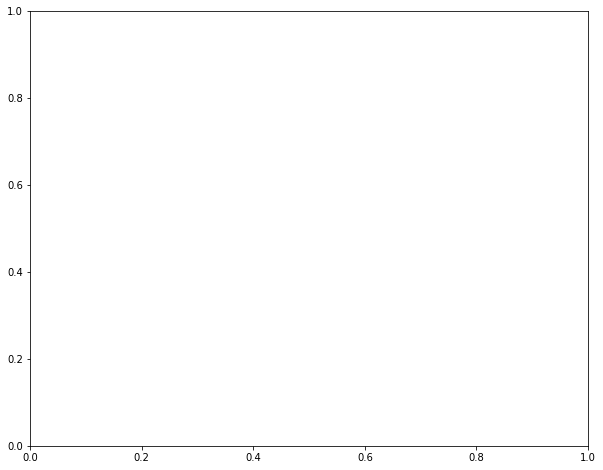

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
cm = confusion_matrix(y_test, lgb_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0', 'Predict Positive:1', 'Predict Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0', 'Actual Positive:1', 'Actual Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix\n")
plt.tight_layout()

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98    222447
           2       0.93      0.85      0.89    222505
           3       0.98      0.99      0.98    221750
           4       0.95      0.97      0.96    666489

    accuracy                           0.96   1333191
   macro avg       0.96      0.95      0.95   1333191
weighted avg       0.96      0.96      0.96   1333191



----

In [24]:
predict_train = lgb.predict(x_train)
print("train score : {}".format(lgb.score(x_train, y_train)))
predict_test = lgb.predict(x_test) 

from sklearn.metrics import classification_report
print(classification_report(y_test, lgb.predict(x_test)))
print("test score : {}".format(lgb.score(x_test, y_test)))

KeyboardInterrupt: ignored

---

In [ ]:
def get_clf_eval(y_test, lgb_pred):
    confusion = confusion_matrix(y_test, lgb_pred)
    accuracy = accuracy_score(y_test, lgb_pred)
    precision = precision_score(y_test, lgb_pred, average = 'macro')
    recall = recall_score(y_test, lgb_pred, average = 'macro')
    F1 = f1_score(y_test, lgb_pred, average = 'macro')
    # AUC = roc_auc_score(y_test, lgb_pred, multi_class='ovo')
    print('오차행렬:\n', confusion)
    print('\n정확도:{:.4f}'.format(accuracy))
    print('정밀도:{:.4f}'.format(precision))
    print('재현율:{:.4f}'.format(recall))
    print('F1:{:.4f}'.format(F1))
    # print('AUC:{:.4f}'.format(AUC))

In [ ]:
get_clf_eval(y_test, lgb_pred)

---

In [ ]:
# plot_importance()를 이용한 피처 중요도 시각화

from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 6))
plot_importance(lgb, max_num_features=6, ax=ax) # 상위 6개만

### 에러 측정

In [ ]:
# mse = mean_squared_error(y_test, predict_test)
# r2 = r2_score(y_test, predict_test)

In [ ]:
# print('Mean squared error: ', mse)
# print('R2 score: ', r2)

In [ ]:
# final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)

In [ ]:
# final_result.columns = ['label','predict']

In [ ]:
# sns.regplot(x = 'label', y = 'predict', data = final_result)

----

### LGBMClassifier 상위 모델(?) -> HistGradientBoostingClassifier

In [ ]:
# lgb_clf = lgb.LGBMClassifier(num_leaves=31, objective='binary')
# lgb_clf.fit(x_train, y_train)
# y_pred = lgb_clf.predict(x_test)
# accuracy_score(y_test, y_pred)

# d_train = lgb.Dataset(x_train, label=y_train)
# param = {'num_iterations': 100, 'learning_rate' : 0.1, 'max_depth' : -1, 'objective': 'binary', 'metric':'auc'}

In [ ]:
# from sklearn.ensemble import HistGradientBoostingClassifier as hgbc

In [ ]:
# hgbc.score(x_train)